In [1]:
import numpy as np 
import pandas as pd 
import tensorboard 
import tensorflow as tf 
import cv2 
import csv 
import sys 
import keras
import random 
import  os 
from imgaug import augmenters as iaa 

Using TensorFlow backend.


##**IMPLEMENATATION DETAILS**:

batch_size: amount of samples that will be feed-forward in our model at once, after which loss is computed . Here, it is set to 64 .

* Img_width = 32, Img_height = 32, Channels = 3 as RGB image
* Loss_function: Compare predictions with ground truth during training
               (Used Binary Cross Entropy Loss)
* Number of classes: 100
* Number of epoch/iterations: 100
* Total Number of Parameters : 6,777,060

* Optimizer: Method by which we update the weights of our neural network
20% of data used fro validation . Here , I have used RMSProp with LR=0.0001 
and decay as (1e-06)



* We use sparse categorical crossentropy instead of true categorical crossentropy. Categorical crossentropy requires our data to be categorical, which can e.g. be achieved with to_categorical i.e. one-hot encoding of your target vectors. 

* Our targets are integers in the range [0,9] so no need to convert them to 100x1 vectors . (One Hot Vector Encoding)


In [0]:
from tensorflow.keras import datasets,layers,models 
import matplotlib.pyplot as plt 

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()
train_images=train_images.astype('float32')
test_images = test_images.astype('float32')
train_images/= 255.
test_images/= 255.

train_labels= keras.utils.to_categorical(train_labels,100)
test_labels = keras.utils.to_categorical(test_labels, 100)

print('x_train LABELS shape:',train_labels.shape)
print('x_test LABELS shape:',test_labels.shape)
# Normalize pixel values to be between 0 and 1

169009152/169001437 [==============================] - 2s 0us/step
x_train LABELS shape: (50000, 100)
x_test LABELS shape: (10000, 100)


In [0]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

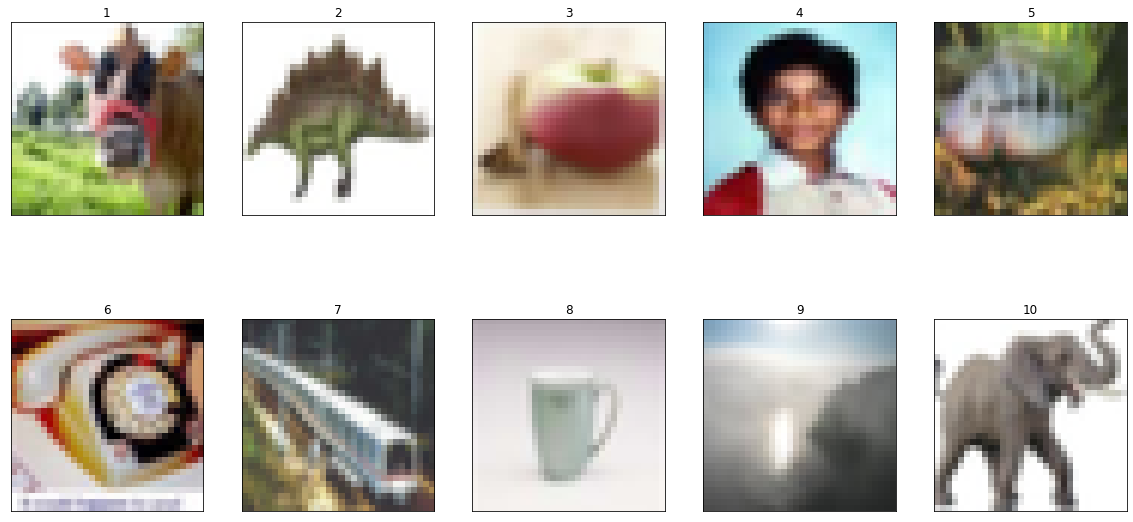

In [5]:
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.asarray(train_images[i]))
  plt.title(i+1)
plt.show()

In [0]:

from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


Techniques used:
* Batch Normalization
Added batch norm layers after all the convolution layers. The idea is that if we normalize the inputs in order to improve training why can't we do that while giving input to the hidden layers. It stabilizes training and acts as a sort of a regularizer. Batch normalization reduces the amount by what the hidden unit values shift around.
* Dropout:
Dropout refers to ignoring units (i.e. neurons) during the training phase of a certain set of neurons which is chosen at random. Dropout is useful to prevent overfitting. A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.
* Average Pooling:
Instead of taking MaxPooling() while downsampling we can take the average of the samples which gives us AveragePool().


In [0]:
import keras.layers as KL
from keras.layers import Conv2D,Activation,MaxPooling2D,Dropout
from keras.layers import Dense, Dropout, Activation, Flatten

model=keras.models.Sequential()
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 256)      

In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSpro
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
epochs = 100
data_augmentation = True
num_predictions = 20
batch_size = 64
validations = []
history=model.fit(train_images,train_labels,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(test_images, test_labels),
            shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 71s 1ms/step - loss: 3.9250 - accuracy: 0.1103 - val_loss: 3.4170 - val_accuracy: 0.2026
Epoch 2/100
50000/50000 [==============================] - 63s 1ms/step - loss: 3.2989 - accuracy: 0.2155 - val_loss: 3.0465 - val_accuracy: 0.2729
Epoch 3/100
50000/50000 [==============================] - 62s 1ms/step - loss: 2.9381 - accuracy: 0.2843 - val_loss: 2.7206 - val_accuracy: 0.3372
Epoch 4/100
50000/50000 [==============================] - 63s 1ms/step - loss: 2.6916 - accuracy: 0.3328 - val_loss: 2.4796 - val_accuracy: 0.3814
Epoch 5/100
50000/50000 [==============================] - 63s 1ms/step - loss: 2.5087 - accuracy: 0.3701 - val_loss: 2.3317 - val_accuracy: 0.4146
Epoch 6/100
50000/50000 [==============================] - 63s 1ms/step - loss: 2.3435 - accuracy: 0.4065 - val_loss: 2.2589 - val_accuracy: 0.4240
Epoch 7/100
50000/50000 [==============================] - 63s

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
score = model.evaluate(test_images,test_labels, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [0]:
predict_gen = model.predict_generator(datagen.flow(test_images,test_labels,
                                      batch_size=batch_size),
                                      steps=test_images.shape[0] // batch_size)

for predict_index, predicted_y in enumerate(predict_gen):
    actual_label = labels['fine_label_names'][np.argmax(y_test[predict_index])]
    predicted_label = labels['fine_label_names'][np.argmax(predicted_y)]
    print('Actual Label = %s vs. Predicted Label = %s' % (actual_label,
                                                          predicted_label))
    if predict_index == 20:
        break